# FIT5149 S2 2021 
# Assessment 1:  Electric Rotor Temperature Prediction


Student information
- Family Name: JAJORIA
- Given Name: PRASHANT
- Student ID: 31187366
- Student email: pjaj0001@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- psych
- ggplot2
- Hmisc
- GGally
- tidyverse
- leaps
- caret
- FNN

## Table of Contents

1. [Introduction](#sec_1)
2. [Exploratory Data Analysis](#sec_2)
3. [Task A : Prediction Task](#sec_3)
4. [Feature Selection](#sec_4)
5. [Model 2 - KNN](#sec_5)
6. [Comparing the metrics of both Linear model and KNN <a class="anchor" id="sec_6"></a>](#sec_6)
7. [Results and discussion](#sec_7)
8. [Task B : Inference task](#sec_8)
9. [Conclusion](#sec_9)
10. [ References ](#sec_10)

## 1. Introduction <a class="anchor" id="sec_1"></a>

We are provided with 'pmsm_temperature_data_A1_2021.csv' file, which has observations from various sensors of a permanent magnet synchronous motor (PMSM). Due to limitations of being able to dirtectly measure the tempearture of the rotor because of safety issues and sensor outages, we study the dataset and make a Machine Learning model that can provide good prediction of the rotot temperature. 

The first half of the notebook shows Exploratory Data Analysis (EDA), in which we understand the nature and explore the dataset. We take a closer look at each feature understand their distribution and how it affects out target variable. We make visual representations of different types to see the interactions between the variables and the target. Finally we summarize the key findings from the EDA and use these in the model development phase later.

The second half of the notebook discusses about making different Machine learning model and choosing the best model amongst them. We discuss the key points of model development, understand the role of features and how we arrive at our final Machine Learning model. We run our final ML model to get predictions on the Test datset and note key metrics about the model.

As we are given a single dataset, we partition it into two parts; training set which will be used for training the ML model. Testing dataset will be used to get key metrics to evaluate the performance of the ML model.

Loading the libraries needed for the notebook.

In [1]:
library(psych)
library(ggplot2)
library(reshape2)
library(GGally)
library(tidyverse)
library(leaps)
library(caret)
library(FNN)
library(gridExtra)
library(car)

Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Wa

## 2. Exploratory Data Analysis<a class="anchor" id="sec_2"></a>

Load the dataset into the notebook

In [2]:
# Read the dataset
dataset = read.csv('./pmsm_temperature_data_A1_2021.csv')

We remove the unnecessary columns as given in the requirement i.e. 'stator_yoke', 'stator_tooth', 'stator_winding'

In [3]:
# Remove the unnecessary columns
dataset = dataset[,c(-10,-11,-12)]

Looking at the final features and the target variable 'pm' from the dataset.

In [4]:
colnames(dataset)

[1] "ambient"     "coolant"     "u_d"         "u_q"         "motor_speed"
 [6] "torque"      "i_d"         "i_q"         "pm"          "profile_id"

The dataset contains 15147 observations on the following 9 variables with **'profile_id'** used for sampling purpose. (The following detail is copied and pasted from <a href="https://www.kaggle.com/wkirgsn/electric-motor-temperature">here</a>)

* <font color="orange">ambinet</font> Ambient temperature as measured by a thermal sensor located closely to the stator.
* <font color="orange">coolant</font> Coolant temperature. The motor is water cooled. Measurement is taken at outflow.
* <font color="orange">u_d</font> Voltage d-component
* <font color="orange">u_q</font> Voltage q-component
* <font color="orange">motor_speed</font> Motor speed
* <font color="orange">torque</font> Torque induced by current.
* <font color="orange">i_d</font> Current d-component
* <font color="orange">i_q</font> Current q-component
* <font color="orange">pm</font> Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared
* <font color="orange">profile_id</font> Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are

Looking at the datatypes of the dataset.

In [5]:
str(dataset)

'data.frame':	15147 obs. of  10 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...
 $ profile_id : int  4 4 4 4 4 4 4 4 4 4 ...


In [6]:
# check the first few rows
head(dataset)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
0.1176819,-1.040829,-1.0267303,0.9250645,1.2124813,0.3586899,-0.8343090,0.3229330,-0.08831267,4
-0.5547717,-1.087189,-1.2258921,0.5125759,2.0241232,0.2841797,-1.3638294,0.2340145,0.71040170,4
-0.7722329,-1.063652,0.2988575,0.9562448,-0.1402458,-0.2591392,1.0291220,-0.2457111,-1.59260400,4
0.2199584,-1.083475,-1.0261079,0.9278145,1.2124836,0.3574240,-0.8381095,0.3228101,-0.14167030,4
0.4015749,-1.078981,0.3155328,-0.7094008,-0.9518901,-0.2562895,1.0291730,-0.2457109,-1.96488810,4
-0.7697667,-1.089577,0.2999456,0.9589649,-0.1402460,-0.2592790,1.0291333,-0.2457186,-1.77564350,4


In [7]:
# check the last few rows
tail(dataset)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
15142,-0.6974700,1.49688820,0.3176318,-1.324828,-1.22242870,-0.2556397,1.0291415,-0.2457166,-0.835639600,81
15143,-0.1489317,1.74755540,0.2998942,-1.294876,-1.22242950,-0.2556397,1.0291376,-0.2457070,-0.993255400,81
15144,-0.5091294,1.46453430,-0.7905264,1.208344,0.80467504,0.3245067,-0.2590534,0.3256622,-0.004079474,81
15145,-0.1557110,-0.04516133,0.3011341,-1.294293,-1.22243130,-0.2556397,1.0291479,-0.2457459,-0.771475800,81
15146,-0.1561356,-0.04458057,0.3000615,-1.293905,-1.22242890,-0.2556397,1.0291611,-0.2456962,-0.663378950,81
15147,-0.7672885,-0.30993983,0.3228580,1.125235,-0.03886923,-0.2813110,1.0211550,-0.2752085,-1.903265100,81


We use the profile_id columns to split the dataset into training and testing sets. As stated in the specifications, we use profile_id = 72, 81 for Testing set and the rest of the data for training set. We also remove the profile_id after the data split process as it is no longer needed for the Model development process.

In [8]:
# testing set
testing_set = dataset[dataset$profile_id %in% c(72,81), -10]
# training set
training_set = dataset[dataset$profile_id !=72 & dataset$profile_id !=81 , -10]

Computing basic statistics of the training set to know about the nature of each feature.

In [9]:
round(describe(training_set),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ambient,1,9652,0.005,1.013,0.295,0.094,0.608,-3.328,2.711,6.038,-0.873,0.746,0.01
coolant,2,9652,-0.009,1.002,-0.185,-0.120,1.266,-1.237,2.278,3.515,0.651,-0.716,0.01
u_d,3,9652,-0.010,1.003,0.246,-0.053,1.019,-1.654,2.273,3.927,0.220,-0.527,0.01
u_q,4,9652,0.008,0.996,-0.093,-0.030,1.308,-1.815,1.770,3.585,0.191,-1.263,0.01
motor_speed,5,9652,0.012,0.999,-0.140,-0.047,1.301,-1.222,2.024,3.247,0.318,-1.173,0.01
torque,6,9652,0.010,1.009,-0.136,0.022,0.753,-3.316,3.014,6.330,-0.049,0.719,0.01
i_d,7,9652,-0.016,1.002,0.153,0.095,1.277,-3.176,1.060,4.237,-0.601,-0.763,0.01
i_q,8,9652,0.009,1.009,-0.117,0.022,0.758,-3.309,2.914,6.223,-0.086,0.716,0.01
pm,9,9652,0.011,1.013,0.115,0.042,0.995,-2.605,2.905,5.510,-0.252,-0.369,0.01


The following table gives the key points noted from the summary of the training set.

| Attribute   | Data Type | Comment                                                                              |
|-------------|-----------|--------------------------------------------------------------------------------------|
| ambient     | Numerical | Large skew value of -0.873                                        | 
| coolant     | Numerical | Has low mean value of -0.009 with moderate positive skewness of data                 |
| u_d         | Numerical | Small positive skewness                              |
| u_q         | Numerical | Low skewness and small range from -1.815 to 1.770                                                           |
| motor_speed | Numerical | Lowest range amonght the features from -1.222 to 2.024                               |
| torque      | Numerical | Highest range of value ranging from -3.316 to 3.014                                  |
| i_d         | Numerical | Moderately negative skewed                                                |
| i_q         | Numerical | Lowest skewness amongst the features with second highest range of values ranging from -3.309 to 2.914 |
| pm          | Numerical | Low negative skewness with relatively large range                  |

Looking at the **mean** and the **standard deviation** of the features, the dataset looks **Standardization** as the mean of all the features is close to 0 and Standard devaition is close to 1.

### 2.1 Investigating each variable

#### Looking at Boxplots of each of the features

No id variables; using all as measure variables


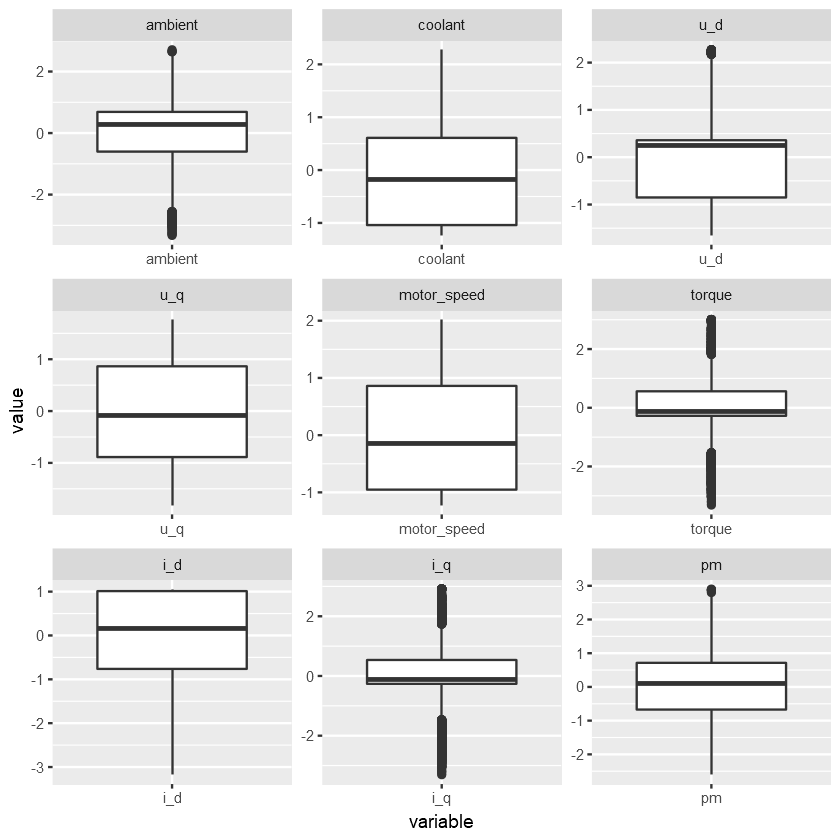

In [10]:
# reshanping for plotting purpose
m1 <- melt(as.data.frame(training_set))

ggplot(m1,aes(x = variable,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

We can notice outlier values in most of the columns. Removing these observations from the dataset will lead to loss of information, so we decide to keep them as of now for the analysis task.

In [11]:
outliers_ambient = boxplot.stats(training_set$ambient)$out
outliers_u_d = boxplot.stats(training_set$u_d)$out
outliers_torque = boxplot.stats(training_set$torque)$out
outliers_i_q = boxplot.stats(training_set$i_q)$out

outliers <- c()
for (name in colnames(training_set)){
    outliers <- c(outliers, 
                  (which(training_set[,name] %in% boxplot(training_set[,name],plot=F)$out)) )
}
total_outliers = length(unique(outliers))

In [12]:
##outlier values
paste( "There are" , length(outliers_ambient), "outliers in feature Ambient" )
paste( "There are" , length(outliers_u_d), "outliers in feature u_d" )
paste( "There are" , length(outliers_torque), "outliers in feature torque" )
paste( "There are" , length(outliers_i_q), "outliers in feature i_q" )

paste("In total there are", total_outliers, 
      "outliers in the dataset, which forms", 
      (total_outliers / dim(training_set)[1]) * 100,
      "% of the training dataset"
     )

[1] "There are 403 outliers in feature Ambient"

[1] "There are 132 outliers in feature u_d"

[1] "There are 1209 outliers in feature torque"

[1] "There are 1293 outliers in feature i_q"

[1] "In total there are 1650 outliers in the dataset, which forms 17.0949026108579 % of the training dataset"

#### Looking at distributions of each of the features

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following object is masked from 'package:psych':

    describe

The following objects are masked from 'package:base':

    format.pval, units



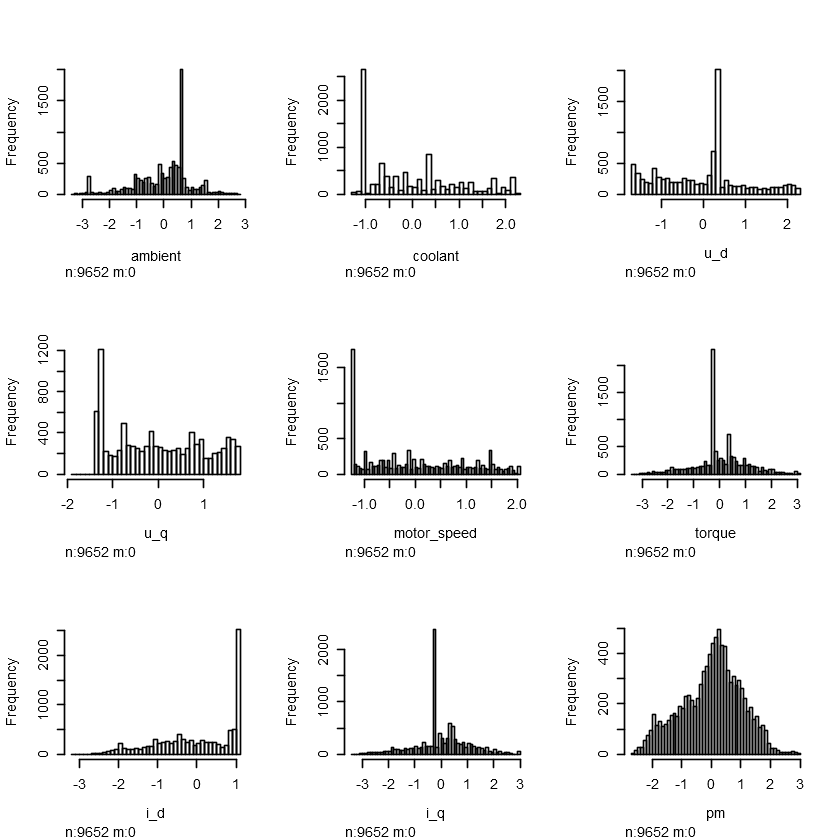

In [13]:
library(Hmisc)
hist.data.frame(training_set)

Key points as noted from the graphs:
- Target variable 'pm' is normally distributed.
- 'i_d' is left skewed.
- 'torque' and 'i_q' is close to Normal distribution.
- 'coolant' and 'motor_speed' has right skewness.

### 2.2 Can we make the features normal ?

1. i_d - As feature is left skewed we try to make it normal by doing log, square or cube root transformation.

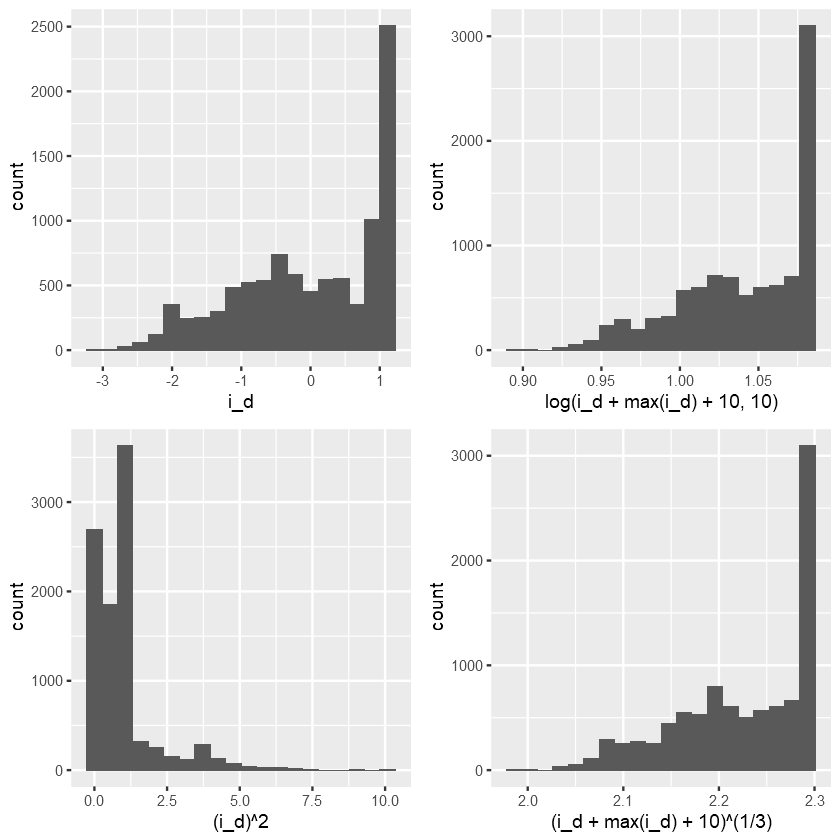

In [14]:
g1 = ggplot(aes(x=i_d), data=training_set) +
      geom_histogram(bins=20)

g2 = ggplot(aes(x=log(i_d+max(i_d)+10,10)), data=training_set) +
      geom_histogram(bins=20)

g3 = ggplot(aes(x=(i_d)**2), data=training_set) +
      geom_histogram(bins=20)

g4 = ggplot(aes(x=(i_d +max(i_d)+10)**(1/3)), data=training_set) +
      geom_histogram(bins=20)


gridExtra::grid.arrange(g1,g2,g3,g4, nrow=2,ncol=2)

The i_d feature cannot be made normal as the transformations are also skewed and do not help the analysis.

2. coolant - As feature is right skewed we try to make it normal by doing log, square or cube root transformation.

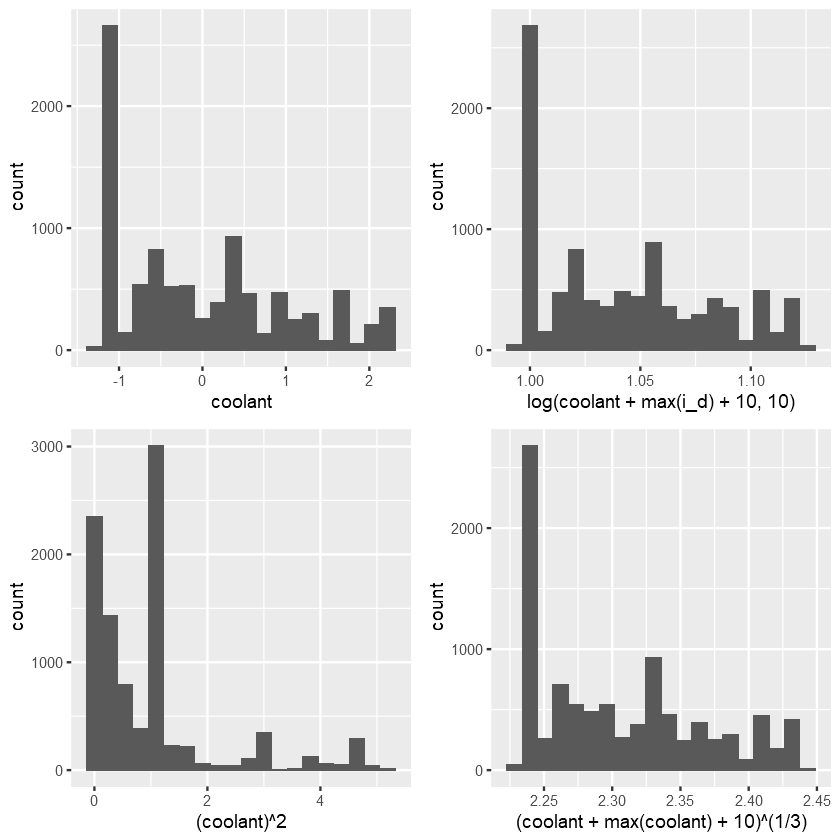

In [15]:
g1 = ggplot(aes(x=coolant), data=training_set) +
      geom_histogram(bins=20)

g2 = ggplot(aes(x=log(coolant+max(i_d)+10,10)), data=training_set) +
      geom_histogram(bins=20)

g3 = ggplot(aes(x=(coolant)**2), data=training_set) +
      geom_histogram(bins=20)

g4 = ggplot(aes(x=(coolant +max(coolant)+10)**(1/3)), data=training_set) +
      geom_histogram(bins=20)



gridExtra::grid.arrange(g1,g2,g3,g4, nrow=2,ncol=2)

Transformations on 'coolant' does not improve the shape of the Distributions and do not help the analysis.

3. motor_speed - As feature is right skewed we try to make it normal by doing log, square or cube root transformation.

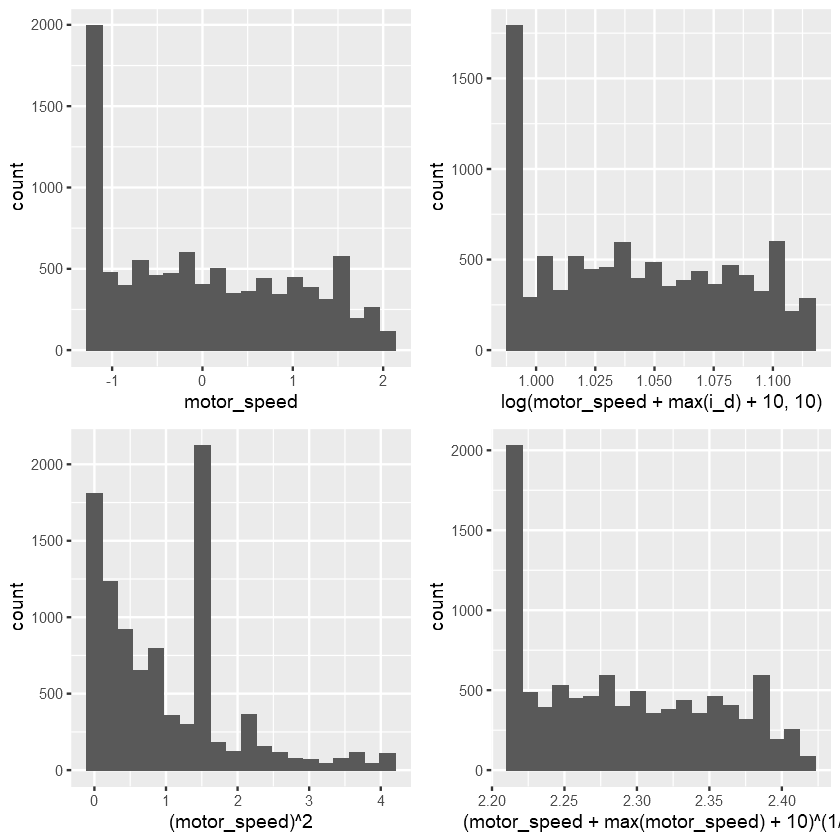

In [16]:
g1 = ggplot(aes(x=motor_speed), data=training_set) +
      geom_histogram(bins=20)

g2 = ggplot(aes(x=log(motor_speed+max(i_d)+10,10)), data=training_set) +
      geom_histogram(bins=20)

g3 = ggplot(aes(x=(motor_speed)**2), data=training_set) +
      geom_histogram(bins=20)

g4 = ggplot(aes(x=(motor_speed +max(motor_speed)+10)**(1/3)), data=training_set) +
      geom_histogram(bins=20)



gridExtra::grid.arrange(g1,g2,g3,g4, nrow=2,ncol=2)

Transformations on 'motor_speed' does not improve the shape of the Distributions and do not help the analysis.

### 2.3 Checking correlatin between variables

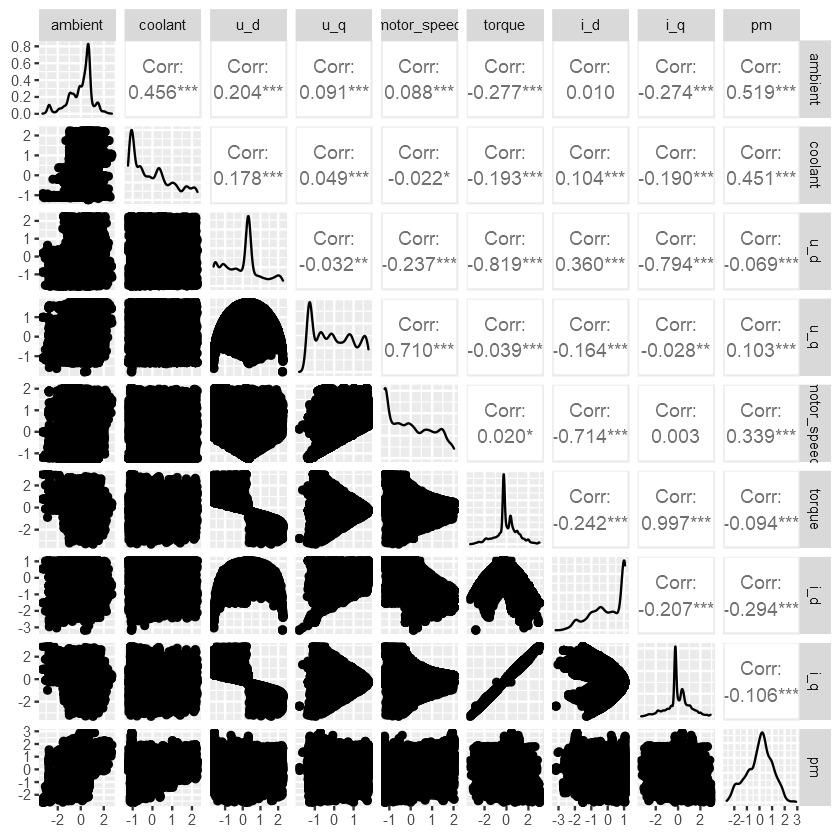

In [17]:
ggpairs(training_set)

Looking at the above pairs plot we observe the following things:
* a positive correlation between <font color='orange'>torque</font> and  <font color='orange'>i_q</font>
* a negative correlation between  <font color='orange'>u_d</font> and  <font color='orange'>i_q</font>
* a positive correlation between <font color='orange'>u_q</font> and  <font color='orange'>motor_speed</font>
* a negative correlation between  <font color='orange'>motor_speed</font> and  <font color='orange'>i_d</font>
* a negative correlation between  <font color='orange'>u_d</font> and  <font color='orange'>torque</font>

## 3. Task A : Prediction Task<a class="anchor" id="sec_3"></a>

### 3.1 Function to Calculate Model Accuracy Statistics

Name: Model.Accuracy

Input parameters:
- predicted - a vector of predictions made by Model
- target - a vector containing the target values for the predictions 

Return Value:

A list containing:
- rss - Residaul Sum of squares - 
- tss - Total sum of squares
- rsquared - the R-Squared value calculated from the predicted and target values
- rmse - Root Mean Square error 

Description:

Calculate the TSS, RSS, R^2, RMSE as follows:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- RMSE: $RMSE = \sqrt {\sum_{i=1}^n (\hat y_i - y_i)^2 / N}$

In [18]:
Model.Accuracy <- function(predicted, target) {
    rss <- 0
    tss <- 0
    se <- 0
    target.mean <- mean(target)
    mse <- 0
    
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
        
        se <- se + (predicted[i]-target[i])^2
    }
    rmse <- sqrt(se/length(predicted))
    rsquared <- 1 - rss/tss
    
    mse = mean((predicted - target)^2)
    
    return(list(rsquared=rsquared, rss=rss, tss=tss, rmse=rmse, mse=mse))
}

Name: rmse

Input parameters:
- predicted - a vector of predictions made by Model
- target - a vector containing the target values for the predictions 

Return Value:

Double value

- rmse - Root Mean Square error 

In [19]:
rmse <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

## 3.2 Model 1 . Linear Regression Model

Using the EDA done above, we start by building a Linear Regression using all the features to predict the target variable 'pm'.

We us this Linear Regression model as the Base line model to compare other Linear Regression models built in this notebook.

###  3.2.1 Simple Linear regression model on Original Dataset

In [20]:
lm.model.base <- lm(pm ~ ., data=training_set)
summary(lm.model.base)


Call:
lm(formula = pm ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8405 -0.4576 -0.0033  0.4600  3.2775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.008559   0.007354   1.164  0.24446    
ambient      0.366167   0.008425  43.464  < 2e-16 ***
coolant      0.325430   0.008323  39.102  < 2e-16 ***
u_d         -0.173105   0.016134 -10.729  < 2e-16 ***
u_q         -0.348085   0.016017 -21.732  < 2e-16 ***
motor_speed  0.558009   0.023805  23.440  < 2e-16 ***
torque      -0.328479   0.117968  -2.784  0.00537 ** 
i_d          0.039080   0.016901   2.312  0.02078 *  
i_q          0.243389   0.110906   2.195  0.02822 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7223 on 9643 degrees of freedom
Multiple R-squared:  0.4919,	Adjusted R-squared:  0.4914 
F-statistic:  1167 on 8 and 9643 DF,  p-value: < 2.2e-16


An adjusted R-squared ( 𝑅2 ) of 49.1% means that the model is able to explain 49.1% of the variations in the values of 'pm'.

The pr(>|t|) value for all the coefficeints shows that all the coefficients are significant at 0.05 level.

p-value of 1.17e+03 on 8 and 9643 DF, tells that the hypothesis that the model explains nothing is rejected.

### 3.2.2 Adding new features

The dataset contains voltage and current that are resolved into d and q components. Thus we can get the effective magnitude using basic equation as follows:

$i_s = \sqrt {(i_q)^n + (i_d)^2 }$

$u_s = \sqrt {(u_q)^n + (u_d)^2 }$

In [21]:
i_s = c(sqrt(training_set['i_d']*training_set['i_d'] + training_set['i_q']*training_set['i_q'])) 
i_s_test = c(sqrt(testing_set['i_d']*testing_set['i_d'] + testing_set['i_q']*testing_set['i_q'])) 

u_s = c(sqrt(training_set['u_d']*training_set['u_d'] + training_set['u_q']*training_set['u_q'])) 
u_s_test = c(sqrt(testing_set['u_d']*testing_set['u_d'] + testing_set['u_q']*testing_set['u_q'])) 

In [22]:
# adding the new features to training and test set
training_set_new = data.frame(cbind(training_set,i_s,u_s))
test_set_new = data.frame(cbind(testing_set,i_s_test,u_s_test))

In [23]:
colnames(training_set_new) =  c('ambient' ,'coolant' ,'u_d', 'u_q' ,'motor_speed' ,'torque', 'i_d' ,'i_q' ,'pm','i_s','u_s')
colnames(test_set_new) =  c('ambient' ,'coolant' ,'u_d', 'u_q' ,'motor_speed' ,'torque', 'i_d' ,'i_q' ,'pm','i_s','u_s')

Computing Power the Active and Reactive power of voltage and current in dq reference frame using the below formulas:

active_power = $\frac{3}{2}[(V_d*I_d) + (V_q*I_d)] $

reactive_power = $\frac{3}{2}[(V_q*I_d)- (V_d*I_d)] $

In [24]:
# computing active power
active_power = c(1.5* (training_set_new[,3]*training_set_new[,7] + training_set_new[,4]*training_set_new[,8]) )
training_set_new = data.frame(cbind(training_set_new, active_power))

active_power = c(1.5* (test_set_new[,3]*test_set_new[,7] + test_set_new[,4]*test_set_new[,8]) ) 
test_set_new = data.frame(cbind(test_set_new, active_power))

In [25]:
# computing reactive power
reactive_power = c(1.5 * (training_set_new[,4]*training_set_new[,8] - training_set_new[,3]*training_set_new[,7])  ) 
training_set_new = data.frame(cbind(training_set_new, reactive_power))

reactive_power = c(1.5 * (test_set_new[,4]*test_set_new[,8] - test_set_new[,3]*test_set_new[,7]) ) 
test_set_new = data.frame(cbind(test_set_new, reactive_power))

### 3.2.3 Simple Linear regression model on dataset with new features

In [26]:
lm.model.no_interactions <- lm(pm ~ ., data=training_set_new)
summary(lm.model.no_interactions)


Call:
lm(formula = pm ~ ., data = training_set_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7479 -0.4431  0.0044  0.4611  3.2596 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.632515   0.054909 -11.519  < 2e-16 ***
ambient         0.369937   0.008335  44.386  < 2e-16 ***
coolant         0.340865   0.008150  41.826  < 2e-16 ***
u_d            -1.653748   0.116322 -14.217  < 2e-16 ***
u_q            -0.442963   0.021301 -20.796  < 2e-16 ***
motor_speed     0.456303   0.035605  12.816  < 2e-16 ***
torque         -2.856379   0.238402 -11.981  < 2e-16 ***
i_d             0.354420   0.038168   9.286  < 2e-16 ***
i_q             1.603774   0.256359   6.256 4.12e-10 ***
i_s             0.430667   0.032613  13.205  < 2e-16 ***
u_s             0.159764   0.025108   6.363 2.07e-10 ***
active_power   -0.476039   0.042087 -11.311  < 2e-16 ***
reactive_power -0.199211   0.010207 -19.517  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0

Adding the new features have increased the Adj-R squared value from 0.491 to 0.503 as compared the baseline model. One thing that we can notice is all the features are significant at 0.05 level. This is due to the fact that we have not yet introduced Interaction terms that we explored in the EDA.

### 3.2.4 Adding Interaction terms to our model

The interaction terms that are added are the features that we saw have high correlation between each other. Introducing them can help explain the missing variance of the previous model and supports the EDA.

In [27]:
lm.model.interactions <- lm(pm ~ . + torque*i_q + u_d*i_q + u_q*motor_speed + motor_speed*i_d + u_d*torque , data=training_set_new)
summary(lm.model.interactions)


Call:
lm(formula = pm ~ . + torque * i_q + u_d * i_q + u_q * motor_speed + 
    motor_speed * i_d + u_d * torque, data = training_set_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4606 -0.3972  0.0120  0.4050  3.4335 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.893216   0.072177  12.375  < 2e-16 ***
ambient          0.325935   0.008002  40.733  < 2e-16 ***
coolant          0.263714   0.008002  32.958  < 2e-16 ***
u_d             -1.434445   0.118420 -12.113  < 2e-16 ***
u_q             -3.361425   0.088640 -37.922  < 2e-16 ***
motor_speed      4.246554   0.120439  35.259  < 2e-16 ***
torque          -4.067513   0.239967 -16.950  < 2e-16 ***
i_d              2.124752   0.074865  28.381  < 2e-16 ***
i_q              3.092906   0.256909  12.039  < 2e-16 ***
i_s              0.296769   0.059976   4.948 7.62e-07 ***
u_s              0.176773   0.028314   6.243 4.46e-10 ***
active_power    -0.352713   0.042318  -8.335  < 2e-16 *

We can see from the summary of the new model that introducing Interaction terms have increased the Adj R-squared value by a significant value from 0.491 to 0.573 comparing to the baseline model. This is a 16.7% increase in the Adj R-Squared value comparing to the baseline model.

## 4. Feature Selection <a class="anchor" id="sec_4"></a>

The Linear Regression that we have built up till now have been using all the features and different interactions between them. This can make the model overfit the training set, increase the computation time and difficult to interpret the model due to increases feature space. 

In this section we will try to reduce the feature space to make the models light weight, as this is one of our requiremnts for the prediction task. We perform step wise selection with exhaustive, forward and backward approach to compare the features obtained at each stage and select the final feature for the Linear Regression model.

### 4.1. Exhaustive method

In [28]:
lm.model.exhaustive <- regsubsets(pm ~ . + torque*i_q + u_d*i_q + u_q*motor_speed + motor_speed*i_d + u_d*torque , data = training_set_new)
reg.summary <- summary(lm.model.exhaustive)
reg.summary

Subset selection object
Call: regsubsets.formula(pm ~ . + torque * i_q + u_d * i_q + u_q * 
    motor_speed + motor_speed * i_d + u_d * torque, data = training_set_new)
17 Variables  (and intercept)
                Forced in Forced out
ambient             FALSE      FALSE
coolant             FALSE      FALSE
u_d                 FALSE      FALSE
u_q                 FALSE      FALSE
motor_speed         FALSE      FALSE
torque              FALSE      FALSE
i_d                 FALSE      FALSE
i_q                 FALSE      FALSE
i_s                 FALSE      FALSE
u_s                 FALSE      FALSE
active_power        FALSE      FALSE
reactive_power      FALSE      FALSE
torque:i_q          FALSE      FALSE
u_d:i_q             FALSE      FALSE
u_q:motor_speed     FALSE      FALSE
motor_speed:i_d     FALSE      FALSE
u_d:torque          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         ambient coolant u_d u_q motor_speed torque i_d i_q i_s u_s
1  (

Looking at the C_p, BIC, Adj R-squared and RSS for Exhaustive stepwise selection and how they change as the number of features increases.

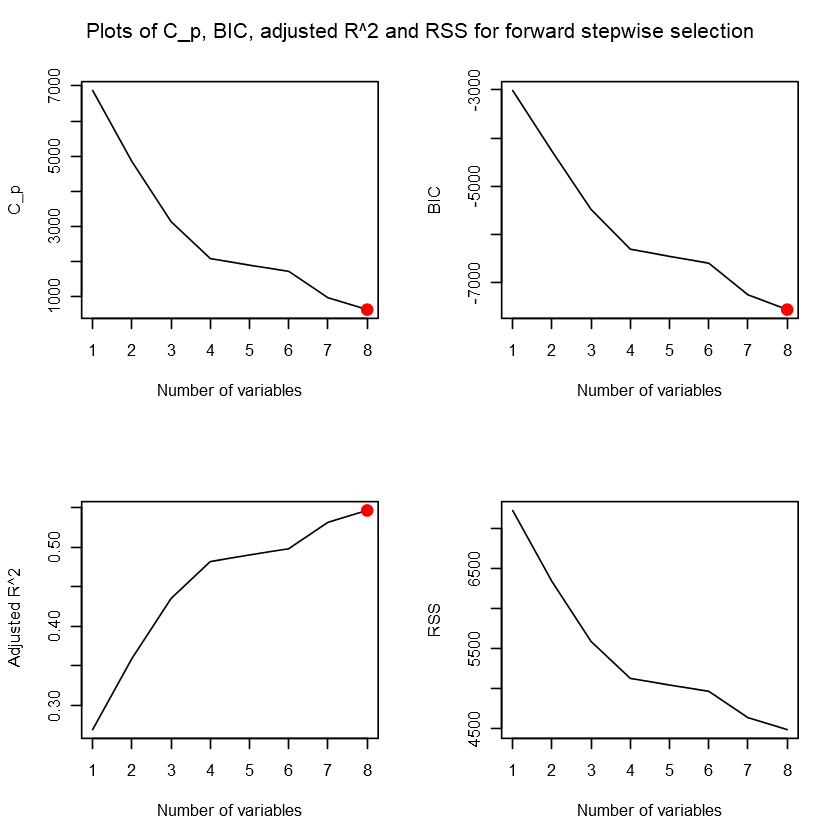

In [29]:
par(mfrow = c(2, 2))
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

We can observe from the above plots that the model with 8 features is overall the best model.

### 4.2. Forward search 

In [30]:
lm.model.forward <- regsubsets(pm ~ . + torque*i_q + u_d*i_q + u_q*motor_speed + motor_speed*i_d + u_d*torque , data = training_set_new)
reg.summary <- summary(lm.model.forward)
reg.summary

Subset selection object
Call: regsubsets.formula(pm ~ . + torque * i_q + u_d * i_q + u_q * 
    motor_speed + motor_speed * i_d + u_d * torque, data = training_set_new)
17 Variables  (and intercept)
                Forced in Forced out
ambient             FALSE      FALSE
coolant             FALSE      FALSE
u_d                 FALSE      FALSE
u_q                 FALSE      FALSE
motor_speed         FALSE      FALSE
torque              FALSE      FALSE
i_d                 FALSE      FALSE
i_q                 FALSE      FALSE
i_s                 FALSE      FALSE
u_s                 FALSE      FALSE
active_power        FALSE      FALSE
reactive_power      FALSE      FALSE
torque:i_q          FALSE      FALSE
u_d:i_q             FALSE      FALSE
u_q:motor_speed     FALSE      FALSE
motor_speed:i_d     FALSE      FALSE
u_d:torque          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         ambient coolant u_d u_q motor_speed torque i_d i_q i_s u_s
1  (

Lets see the optimum number of features.

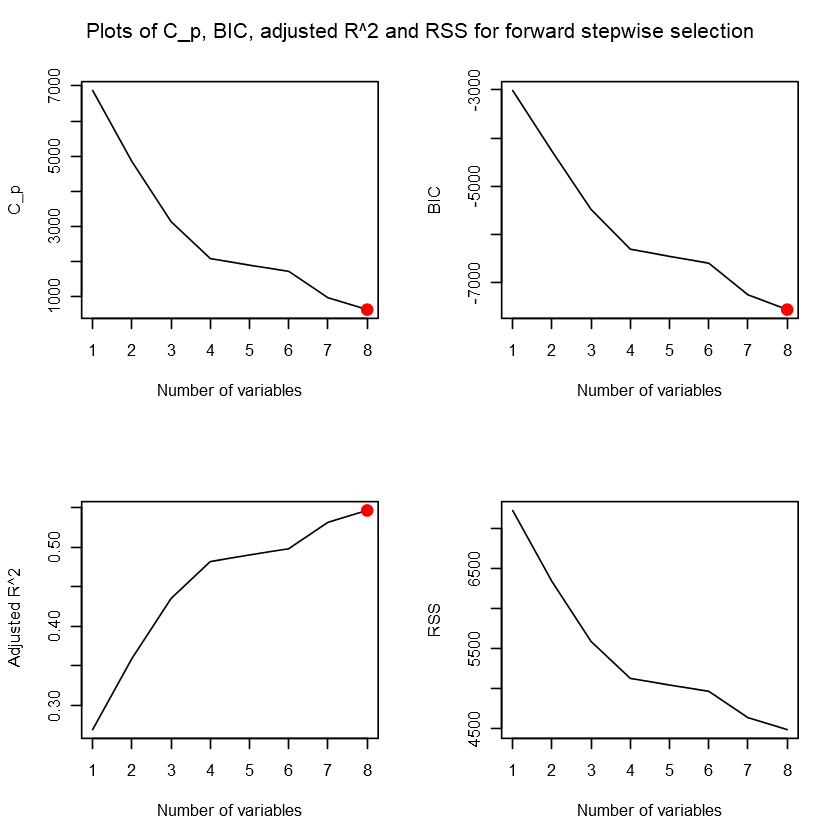

In [31]:
par(mfrow = c(2, 2))
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Forward method also gives the same set of features as Exhaustive method with 8 features selected.

### 4.3 Backward Search

We finally perform Backward seaerch to see if we can find new features that can be include in the Linear Regression model.

In [32]:
lm.model.backward <- regsubsets(pm ~ . + torque*i_q + u_d*i_q + u_q*motor_speed + motor_speed*i_d + u_d*torque , data = training_set_new)
reg.summary <- summary(lm.model.backward)
reg.summary

Subset selection object
Call: regsubsets.formula(pm ~ . + torque * i_q + u_d * i_q + u_q * 
    motor_speed + motor_speed * i_d + u_d * torque, data = training_set_new)
17 Variables  (and intercept)
                Forced in Forced out
ambient             FALSE      FALSE
coolant             FALSE      FALSE
u_d                 FALSE      FALSE
u_q                 FALSE      FALSE
motor_speed         FALSE      FALSE
torque              FALSE      FALSE
i_d                 FALSE      FALSE
i_q                 FALSE      FALSE
i_s                 FALSE      FALSE
u_s                 FALSE      FALSE
active_power        FALSE      FALSE
reactive_power      FALSE      FALSE
torque:i_q          FALSE      FALSE
u_d:i_q             FALSE      FALSE
u_q:motor_speed     FALSE      FALSE
motor_speed:i_d     FALSE      FALSE
u_d:torque          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         ambient coolant u_d u_q motor_speed torque i_d i_q i_s u_s
1  (

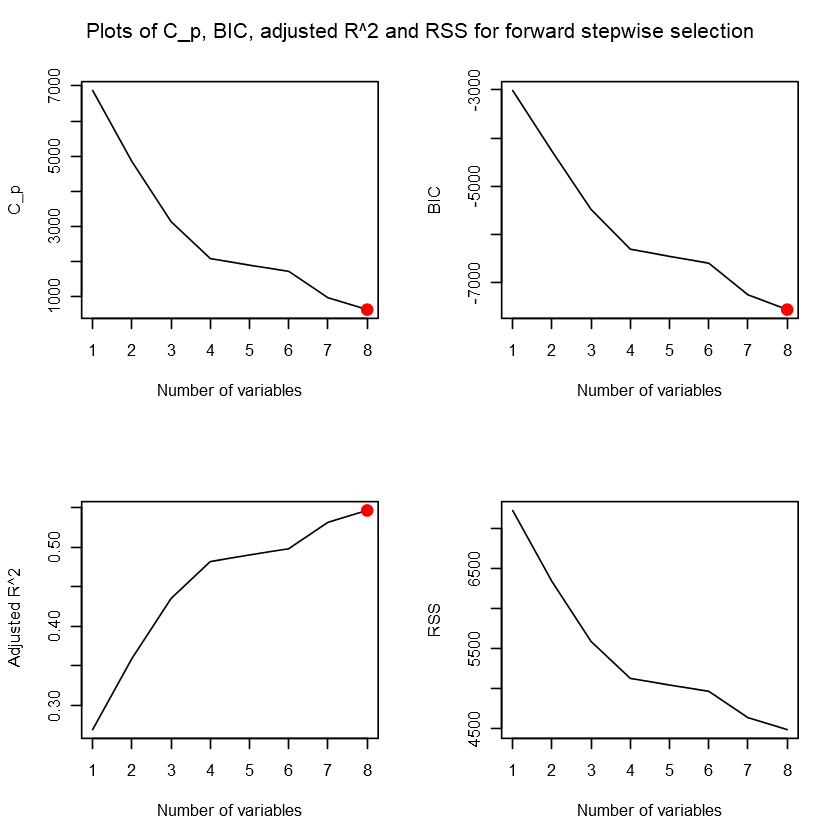

In [33]:
par(mfrow = c(2, 2))
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Backward search also gives the same set of features i.e. 8.

### 4.4 Final reduced features 

We can thus say the reduced feature set contains following terms:
1. ambient 
2. coolant
3. u_d
4. u_q
5. motor_speed
6. i_d
7. u_q:motor_speed
8. motor_speed:i_d

### 4.5 Reduced Linear regression model 

We us the reduced set of features from the result of feature selection process done to make the model light weight.

In [34]:
lm.model.reduced <- lm(pm ~ . + u_q*motor_speed + motor_speed*i_d, data=training_set[,-c(6,8,10,11,12)])
summary(lm.model.reduced)


Call:
lm(formula = pm ~ . + u_q * motor_speed + motor_speed * i_d, 
    data = training_set[, -c(6, 8, 10, 11, 12)])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7353 -0.4119  0.0086  0.4116  3.1791 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.280451   0.038695   33.09   <2e-16 ***
ambient          0.345743   0.007935   43.57   <2e-16 ***
coolant          0.264980   0.008161   32.47   <2e-16 ***
u_d             -0.231716   0.008957  -25.87   <2e-16 ***
u_q             -2.873311   0.079585  -36.10   <2e-16 ***
motor_speed      3.937977   0.105144   37.45   <2e-16 ***
i_d              1.815593   0.054868   33.09   <2e-16 ***
u_q:motor_speed -0.162044   0.009054  -17.90   <2e-16 ***
motor_speed:i_d  1.608581   0.051148   31.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6823 on 9643 degrees of freedom
Multiple R-squared:  0.5466,	Adjusted R-squared:  0.5462 
F-statis

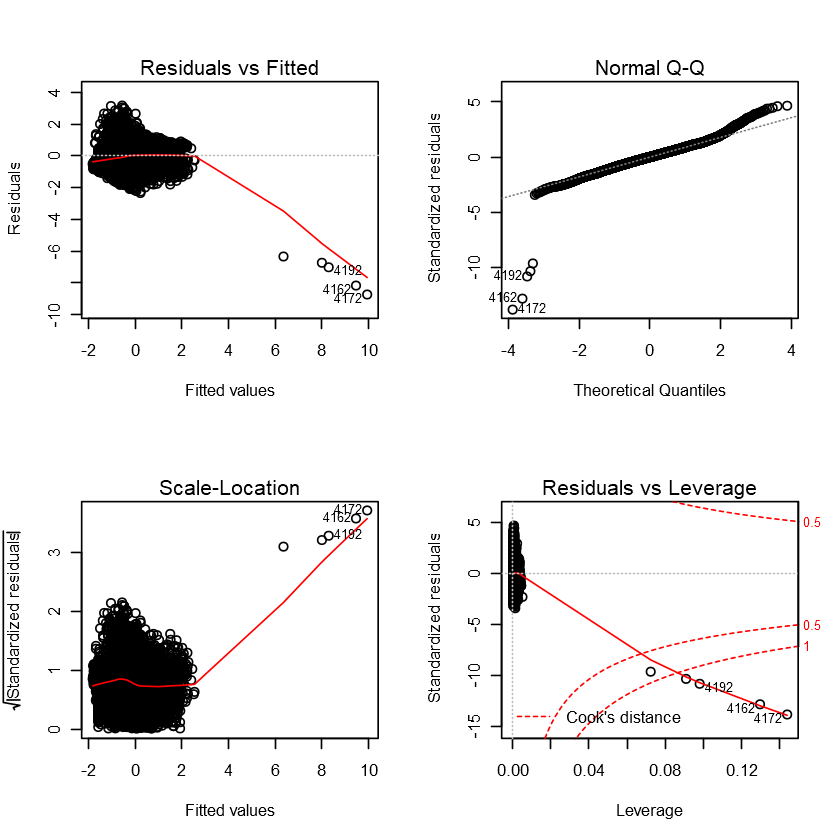

In [35]:
par(mfrow=c(2,2))
plot(lm.model.reduced)

We can see that the Linear model is greatly affected by some outliers. Lets check the influencial outliers

In [36]:
outlierTest(lm.model.reduced, cutoff=0.05, digits = 1)

       rstudent unadjusted p-value Bonferroni p
4172 -13.976287         5.8322e-44   5.6293e-40
4162 -12.948670         4.9565e-38   4.7840e-34
4192 -10.895123         1.7578e-27   1.6966e-23
4201 -10.406880         3.1368e-25   3.0276e-21
4221  -9.691268         4.1421e-22   3.9979e-18
1471   4.666227         3.1091e-06   3.0009e-02
1909   4.620586         3.8762e-06   3.7413e-02

Plotting the Influence plot to see is these are influencing our model.

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
4162,-12.94867,0.1296486,2.727965
4172,-13.97629,0.1438785,3.575495


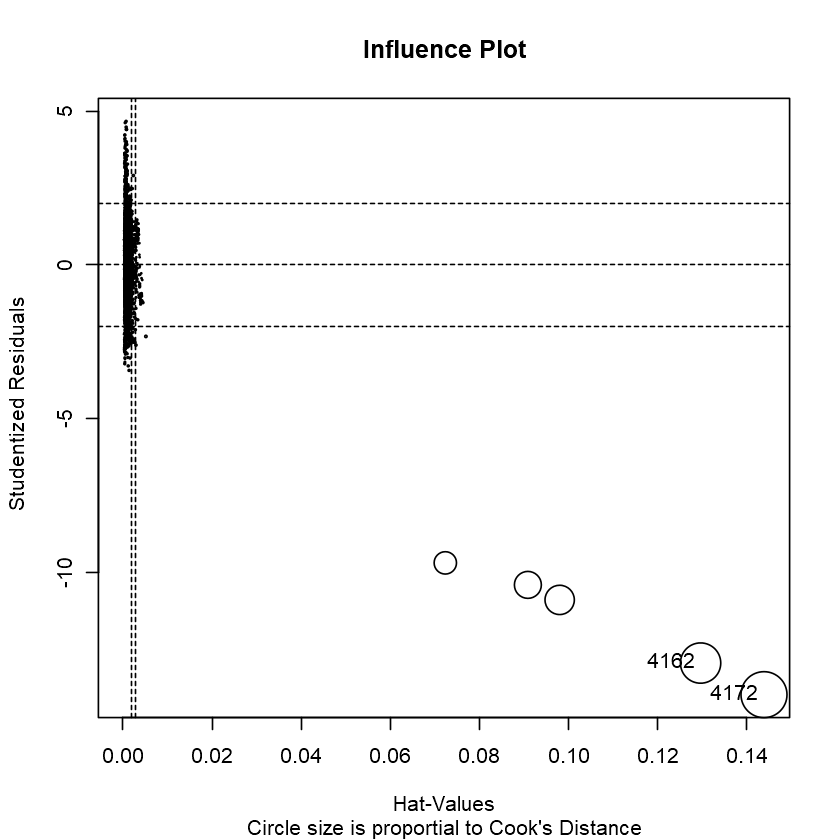

In [37]:
influencePlot(lm.model.reduced, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

The influence plot shows five outliers but have reported 2 of them:
- 4162, 4172 have a large studentized residual and is also an outlier. Large value of studentized residuals means the modle has performed badly for this datapoint.

The datapoints 4192, 4201, 4221, 1471 and 1909 also have large Student Residuals. We make a new Linear model and evaluate the model for performance.

### 4.6 Removing large Outliers

In [38]:
lm.model.reduced.no_outliers <- lm(pm ~ . + u_q*motor_speed + motor_speed*i_d, data=training_set[ -c(4162,4172,4192,4201,4221,1471) ,-c(6,8,10,11,12)])
summary(lm.model.reduced.no_outliers)


Call:
lm(formula = pm ~ . + u_q * motor_speed + motor_speed * i_d, 
    data = training_set[-c(4162, 4172, 4192, 4201, 4221, 1471), 
        -c(6, 8, 10, 11, 12)])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3281 -0.3869 -0.0040  0.3771  3.1087 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.726386   0.052023   52.41   <2e-16 ***
ambient          0.308923   0.007443   41.50   <2e-16 ***
coolant          0.195657   0.007808   25.06   <2e-16 ***
u_d             -0.405002   0.009471  -42.76   <2e-16 ***
u_q             -5.910567   0.108198  -54.63   <2e-16 ***
motor_speed      7.953495   0.142992   55.62   <2e-16 ***
i_d              3.894405   0.074310   52.41   <2e-16 ***
u_q:motor_speed -0.232243   0.008616  -26.95   <2e-16 ***
motor_speed:i_d  3.538363   0.069110   51.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6347 on 9637 degrees of freedom
Multiple R-squared:

We can observe from the Adj R-squared value that the model is now able to explain more variance of the dataset. The Adj R-Squared value has increased from 0.546 to 0.607 as compared to the previous model with outliers. And we have an overall increase of 23.62% compared to the Baseline model.

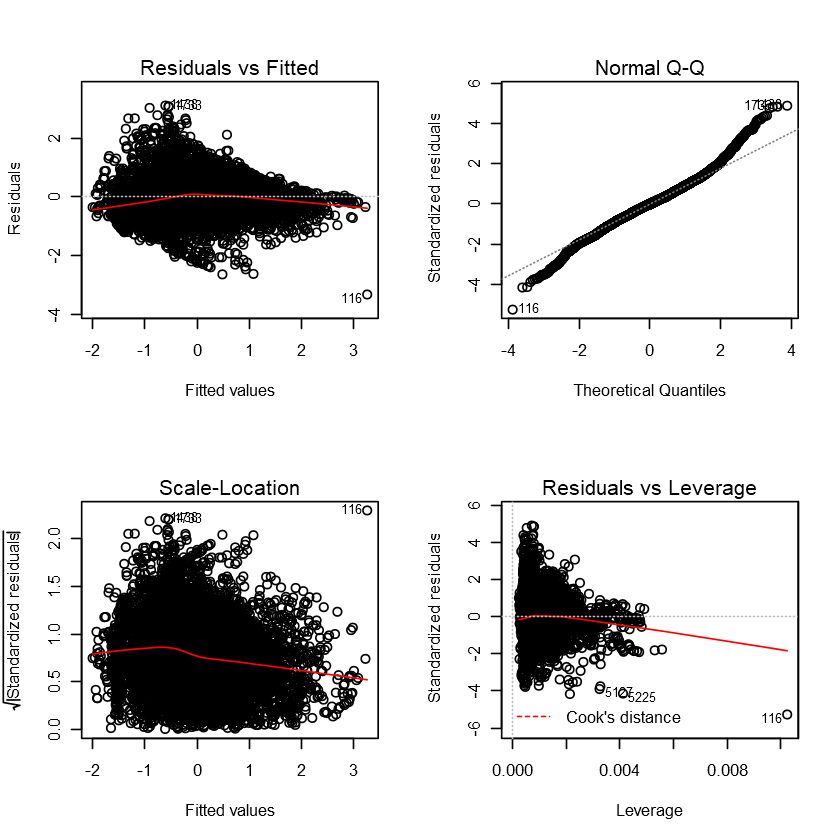

In [39]:
par(mfrow=c(2,2))
plot(lm.model.reduced.no_outliers)

The model plots show:
- Residual vs Fitted - shows the residuals are distributed in a better way as compared to the previous model. The residuals are more evenly distributed along the regression line, meeting the assumption of Linear regression model.
- Normal Q-Q - the residauls have now been evenly distributed making them normally distributed.
- Scale-Location - Variance of residuals looks consistent around 1.
- Residuals vs Leverage - The chart still shows some outliers though they have a small Cook distance.

### 4.7 Comparing the Linear Regression models

### A. Training error

As we noticed in the model development phase that there are few outliers that deviate to a large extent for the model. We make predictions for the training set without those outliers and will predict the values for outliers seperately to investigate further.

### Training error without the outliers

In [40]:
# predictions for different models
y_pred_train_1 = predict(lm.model.reduced.no_outliers, training_set_new[-c(4162,4172,4192,4201,4221,1471),])
y_pred_train_2 = predict(lm.model.reduced, training_set_new[-c(4162,4172,4192,4201,4221,1471),])
y_pred_train_3 = predict(lm.model.base, training_set[-c(4162,4172,4192,4201,4221,1471),])
y_pred_train_4 = predict(lm.model.no_interactions, training_set_new[-c(4162,4172,4192,4201,4221,1471),])
y_pred_train_5 = predict(lm.model.interactions, training_set_new[-c(4162,4172,4192,4201,4221,1471),])

# metrics
paste("Chosen model")
Model.Accuracy(y_pred_train_1,training_set_new[-c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model with outliers")
Model.Accuracy(y_pred_train_2,training_set_new[-c(4162,4172,4192,4201,4221,1471),]$pm)
paste("BaseLine model")
Model.Accuracy(y_pred_train_3,training_set[-c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model without Intearction terms")
Model.Accuracy(y_pred_train_4,training_set_new[-c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model with interaction terms")
Model.Accuracy(y_pred_train_5,training_set_new[-c(4162,4172,4192,4201,4221,1471),]$pm)

[1] "Chosen model"

$rsquared
        1 
0.6073548 

$rss
       1 
3881.876 

$tss
[1] 9886.474

$rmse
        1 
0.6343767 

$mse
[1] 0.4024338

[1] "Model with outliers"

$rsquared
        1 
0.5751011 

$rss
       1 
4200.752 

$tss
[1] 9886.474

$rmse
        1 
0.6599179 

$mse
[1] 0.4354916

[1] "BaseLine model"

$rsquared
        1 
0.4921854 

$rss
       1 
5020.496 

$tss
[1] 9886.474

$rmse
        1 
0.7214391 

$mse
[1] 0.5204744

[1] "Model without Intearction terms"

$rsquared
        1 
0.5190323 

$rss
       1 
4755.075 

$tss
[1] 9886.474

$rmse
        1 
0.7021098 

$mse
[1] 0.4929582

[1] "Model with interaction terms"

$rsquared
        1 
0.6037103 

$rss
       1 
3917.908 

$tss
[1] 9886.474

$rmse
       1 
0.637314 

$mse
[1] 0.4061692

### Error for the outliers

In [41]:
# predictions for different models
y_pred_train_1 = predict(lm.model.reduced.no_outliers, training_set_new[c(4162,4172,4192,4201,4221,1471),])
y_pred_train_2 = predict(lm.model.reduced, training_set_new[c(4162,4172,4192,4201,4221,1471),])
y_pred_train_3 = predict(lm.model.base, training_set[c(4162,4172,4192,4201,4221,1471),])
y_pred_train_4 = predict(lm.model.no_interactions, training_set_new[c(4162,4172,4192,4201,4221,1471),])
y_pred_train_5 = predict(lm.model.interactions, training_set_new[c(4162,4172,4192,4201,4221,1471),])

# metrics
paste("Chosen model")
Model.Accuracy(y_pred_train_1,training_set_new[c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model with outliers")
Model.Accuracy(y_pred_train_2,training_set_new[c(4162,4172,4192,4201,4221,1471),]$pm)
paste("BaseLine model")
Model.Accuracy(y_pred_train_3,training_set[c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model without Intearction terms")
Model.Accuracy(y_pred_train_4,training_set_new[c(4162,4172,4192,4201,4221,1471),]$pm)
paste("Model with interaction terms")
Model.Accuracy(y_pred_train_5,training_set_new[c(4162,4172,4192,4201,4221,1471),]$pm)


[1] "Chosen model"

$rsquared
     4162 
-376.4762 

$rss
    4162 
1291.335 

$tss
[1] 3.420971

$rmse
    4162 
14.67046 

$mse
[1] 215.2225

[1] "Model with outliers"

$rsquared
     4162 
-83.16349 

$rss
    4162 
287.9209 

$tss
[1] 3.420971

$rmse
    4162 
6.927251 

$mse
[1] 47.98681

[1] "BaseLine model"

$rsquared
     4162 
-1.857254 

$rss
    4162 
9.774583 

$tss
[1] 3.420971

$rmse
    4162 
1.276361 

$mse
[1] 1.629097

[1] "Model without Intearction terms"

$rsquared
     4162 
-4.998182 

$rss
    4162 
20.51961 

$tss
[1] 3.420971

$rmse
    4162 
1.849307 

$mse
[1] 3.419935

[1] "Model with interaction terms"

$rsquared
    4162 
-86.2175 

$rss
    4162 
298.3686 

$tss
[1] 3.420971

$rmse
    4162 
7.051815 

$mse
[1] 49.72809

We can observe from the predictions for outliers that the Linear model cannot make good predictions for outliers. This means that the outliers need to be further studied seperately. Following are the outliers that need further investigation, which is out of the scope of this notebook. One possible approach is to make a seperate Machine learning model for such data points so that we can better handle the outliers.

In [42]:
training_set_new[c(4162,4172,4192,4201,4221,1471),]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,i_s,u_s,active_power,reactive_power
4162,0.6903101,1.6358324,0.3101311,-1.277626,0.33858046,-0.08359195,1.060127,-0.2572563,1.28574930,1.090894,1.314728,0.9861834,-0.0001516096
4172,0.6886067,1.6343433,0.3100063,-1.277418,0.42089480,0.41413140,1.059317,-0.2577207,1.19993690,1.090217,1.314496,0.9864180,0.0012327268
4192,0.6893404,1.6359433,0.3101335,-1.277628,0.13859032,0.10246858,1.060145,-0.2572083,1.27006160,1.090901,1.314730,0.9861046,-0.0002550061
4201,0.6886800,1.6360900,0.3101335,-1.277628,0.08912902,0.03529829,1.060148,-0.2572283,1.26490950,1.090908,1.314731,0.9861442,-0.0002180179
4221,0.6873831,-0.8202985,0.3101336,-1.277628,-0.08067378,-0.90592116,1.060164,-0.2572489,0.01488627,1.090928,1.314731,0.9861911,-0.0001858637
1471,0.4160771,-1.0446889,0.3139452,-1.250994,-1.22243080,-0.19248706,1.060110,-0.2572526,2.62675210,1.090877,1.289786,0.9819570,-0.0164924288


### B. Testing error

In [43]:
y_pred_1 = predict(lm.model.reduced.no_outliers, test_set_new)
y_pred_2 = predict(lm.model.reduced, test_set_new)
y_pred_3 = predict(lm.model.base, testing_set)
y_pred_4 = predict(lm.model.no_interactions, test_set_new)
y_pred_5 = predict(lm.model.interactions, test_set_new)

In [45]:
paste("Chosen model")
Model.Accuracy(y_pred_1,test_set_new$pm)
paste("Model with outliers")
Model.Accuracy(y_pred_2,test_set_new$pm)
paste("BaseLine model")
Model.Accuracy(y_pred_3,testing_set$pm)
paste("Model without Intearction terms")
Model.Accuracy(y_pred_4,test_set_new$pm)
paste("Model with interaction terms")
Model.Accuracy(y_pred_5,test_set_new$pm)

[1] "Chosen model"

$rsquared
     9653 
0.1751115 

$rss
    9653 
1986.905 

$tss
[1] 2408.695

$rmse
     9653 
0.6013187 

$mse
[1] 0.3615841

[1] "Model with outliers"

$rsquared
      9653 
0.08843209 

$rss
    9653 
2195.689 

$tss
[1] 2408.695

$rmse
    9653 
0.632123 

$mse
[1] 0.3995795

[1] "BaseLine model"

$rsquared
     9653 
-0.148665 

$rss
    9653 
2766.784 

$tss
[1] 2408.695

$rmse
     9653 
0.7095839 

$mse
[1] 0.5035093

[1] "Model without Intearction terms"

$rsquared
      9653 
-0.1624197 

$rss
    9653 
2799.915 

$tss
[1] 2408.695

$rmse
     9653 
0.7138197 

$mse
[1] 0.5095386

[1] "Model with interaction terms"

$rsquared
      9653 
0.05276203 

$rss
    9653 
2281.607 

$tss
[1] 2408.695

$rmse
     9653 
0.6443719 

$mse
[1] 0.4152152

## 5. Model 2 - KNN  <a class="anchor" id="sec_5"></a>

### 5.1 Why KNN ?

- KNN is easy to implement and also easy to intrepret the results.
- Only 1 hyper paramaters i.e.k
- KNN can be used for regression task as well.
- It has no assumptions about the underlying distribution of data.
- Can we easily adapted to new datapopints.

### 5.2 Scaling the features

As we are using KNN algorithm, we perform feature scaling to bring all the values in same scale. KNN being a distance based algorithm will be highly fluctuating if the features are not scaled

In [46]:
min_max_processor1 <- preProcess(training_set_new, method=c("range"))
min_max_training_set <- predict(min_max_processor1,training_set_new)

min_max_processor2 <- preProcess(test_set_new, method=c("range"))
min_max_testing_set <- predict(min_max_processor2,test_set_new)

### 5.3 Cross Validation

In [47]:
set.seed(123)
grid = expand.grid(k = seq(1,20)) # dataframe of different k values

train.control.knn <- trainControl(method = "cv", 
                                  number = 10,
                                  search="grid",)

# Train the model
knn_cv_grid <- train(pm ~. , 
                data = min_max_training_set, 
                method = "knn",
                trControl = train.control.knn,
                tuneGrid = grid)

knn_cv_grid

k-Nearest Neighbors 

9652 samples
  12 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 8686, 8686, 8688, 8687, 8688, 8687, ... 
Resampling results across tuning parameters:

  k   RMSE        Rsquared   MAE       
   1  0.09808464  0.7355195  0.05671739
   2  0.09063586  0.7627441  0.05738449
   3  0.08884637  0.7688033  0.05802108
   4  0.08853183  0.7690624  0.05901672
   5  0.08857450  0.7681784  0.05981921
   6  0.08960595  0.7625506  0.06118017
   7  0.09053456  0.7575130  0.06234036
   8  0.09159426  0.7517468  0.06352047
   9  0.09265149  0.7459174  0.06474932
  10  0.09358899  0.7407694  0.06577408
  11  0.09454863  0.7354315  0.06686701
  12  0.09550501  0.7300646  0.06788690
  13  0.09644150  0.7247299  0.06888398
  14  0.09731671  0.7197241  0.06979316
  15  0.09821196  0.7145396  0.07059044
  16  0.09900815  0.7099007  0.07142094
  17  0.09958175  0.7065381  0.07206484
  18  0.10025712  0.7025714  0.07278389
  19  0.10095857  0.

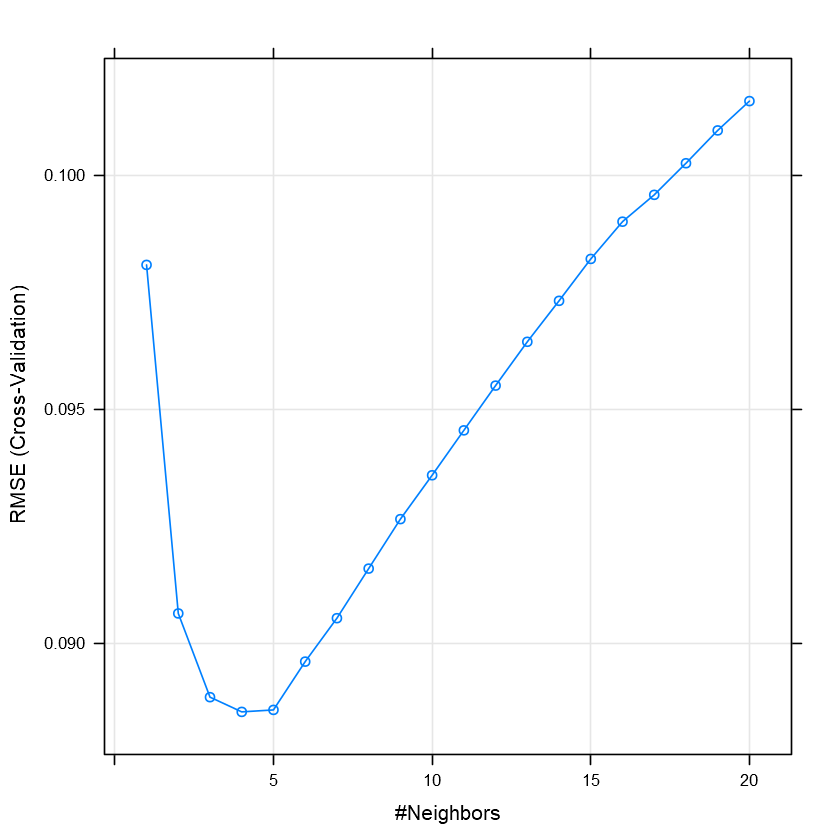

In [48]:
plot(knn_cv_grid)

We can see from the cross-validation that k=4 is a good choice for KNN to predict the 'pm' feature. So we now build the KNN model with k=4 on the whole training dataset.

### 5.4 Training Error

In [49]:
prediction.knn.train = knn.reg(
                            train = min_max_training_set[,-9], 
                            y = min_max_training_set[,9], 
                            test = min_max_training_set[,-9], 
                            k = 4
                        )

In [50]:
df.prediction.knn.train = data.frame(observed = min_max_training_set$pm, 
                       predicted = prediction.knn.train$pred )

`geom_smooth()` using formula 'y ~ x'


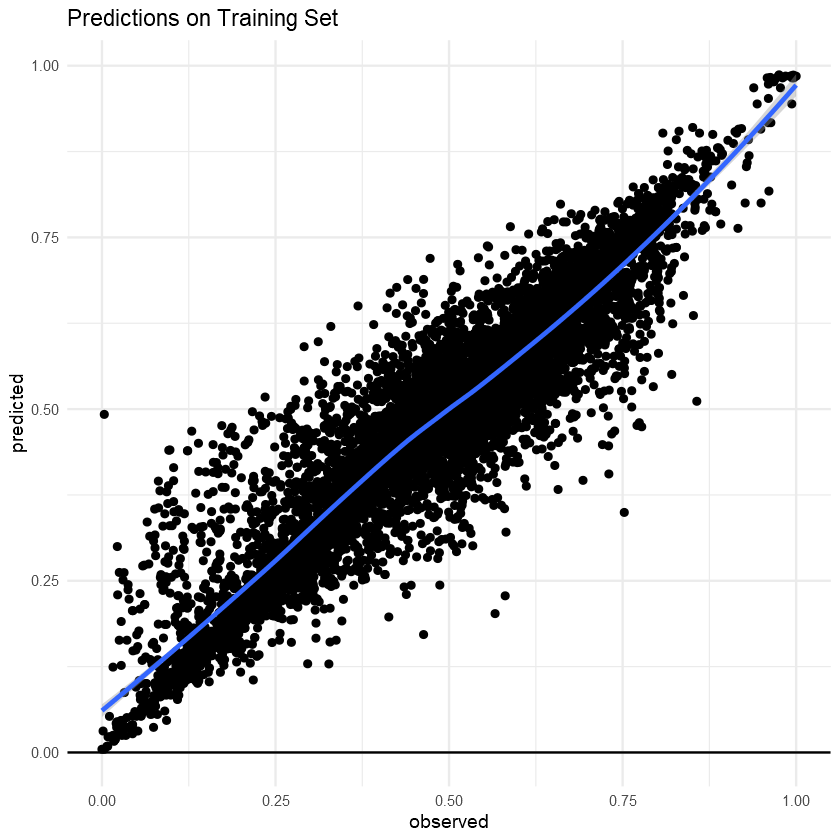

In [51]:
df.prediction.knn.train %>%
  ggplot(aes(observed, predicted)) +
    geom_hline(yintercept = 0) +
    geom_point() +
    stat_smooth(method = "loess") +
    theme_minimal()+
    ggtitle("Predictions on Training Set")

### 5.5 Test Error

In [52]:
prediction.knn.test = knn.reg(
                            train = min_max_training_set[,-9], 
                            y = min_max_training_set[,9], 
                            test = min_max_testing_set[,-9], 
                            k = 4
                        )

In [53]:
df.prediction.knn.test = data.frame(observed = min_max_testing_set$pm, 
                       predicted = prediction.knn.test$pred )

`geom_smooth()` using formula 'y ~ x'


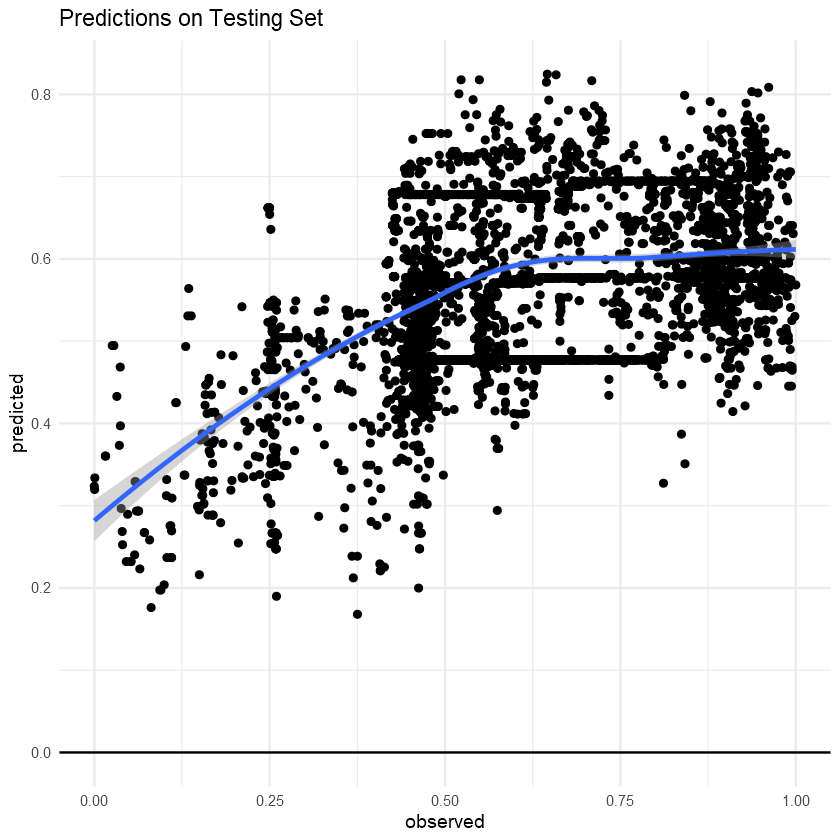

In [54]:
df.prediction.knn.test %>%
  ggplot(aes(observed, predicted)) +
    geom_hline(yintercept = 0) +
    geom_point() +
    stat_smooth(method = "loess") +
    theme_minimal()+
    ggtitle("Predictions on Testing Set")

We can see from the above plots that the value of  k = 4 obtained from cross-validation gives good predictions when the target variable 'pm' is less than 0.5. But for latger values it underestimates the target.

### 5.6 Can we find a better K value ?

In [55]:
df.error.knn = data.frame(k = double(), 
                           train.rmse = double(),
                           test.rmse = double()
                           )

In [56]:
for (k in 1:200){
    prediction.knn.train = knn.reg(
                            train = min_max_training_set[,-9], 
                            y = min_max_training_set[,9], 
                            test = min_max_training_set[,-9], 
                            k = k
                        )
    
    prediction.knn.test = knn.reg(
                            train = min_max_training_set[,-9], 
                            y = min_max_training_set[,9], 
                            test = min_max_testing_set[,-9], 
                            k = k
                        )
    
    rmse.train = rmse(prediction.knn.train$pred, min_max_training_set$pm)
    rmse.test = rmse(prediction.knn.test$pred, min_max_testing_set$pm)
    
    df.error.knn = rbind(df.error.knn, data.frame(k = k, train.rmse = rmse.train, test.rmse = rmse.test) )
}

In [57]:
prediction_errors_long <- melt(df.error.knn, id="k")

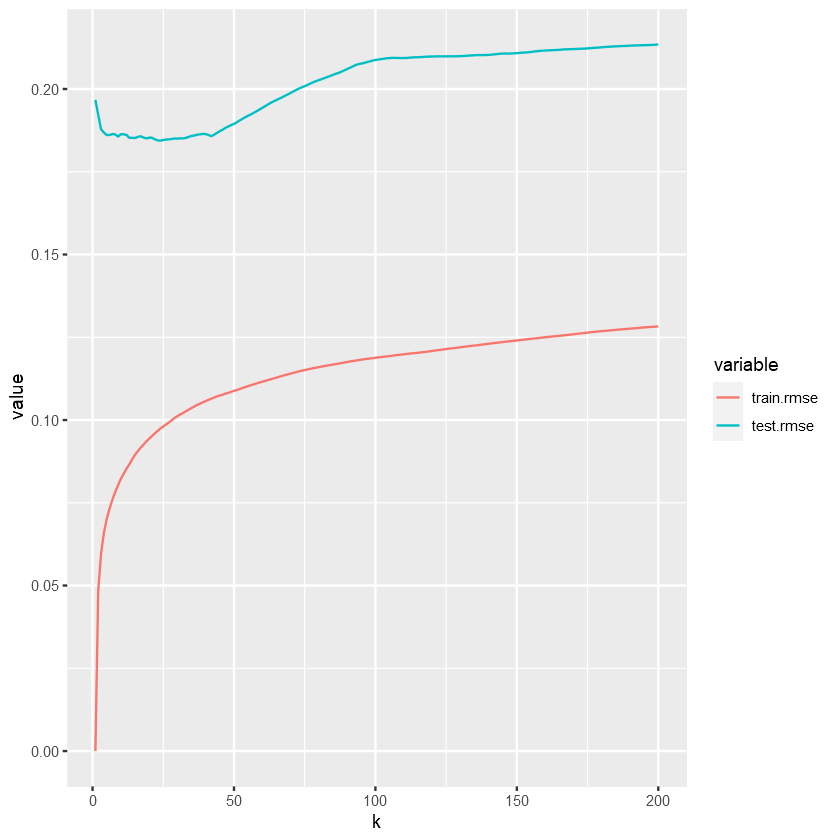

In [58]:
ggplot(data=prediction_errors_long,
       aes(x=k, y=value, colour=variable)) +
       geom_line()

We can observe from the graph above that the test and train error do not converge for k in range [0,200]. Also when we increase the K value we are underfitting the training set and overfitting to the test test. Finding a trade off between the two means finding large value of k. This will be computationally expensive for the given requirement and thus KNN is thus not a good candidate. 

## 6. Comparing the metrics of both Linear model and KNN <a class="anchor" id="sec_6"></a>

### 6.1 Training error

In [59]:
y_pred_train_1 = predict(lm.model.reduced.no_outliers, training_set_new[-c(4162,4172,4192,4201,4221,1471),])
paste("Linear regression model")
Model.Accuracy(y_pred_train_1,training_set_new[-c(4162,4172,4192,4201,4221,1471),]$pm)

[1] "Linear regression model"

$rsquared
        1 
0.6073548 

$rss
       1 
3881.876 

$tss
[1] 9886.474

$rmse
        1 
0.6343767 

$mse
[1] 0.4024338

In [60]:
paste("Metrics of KNN k=4")
Model.Accuracy(prediction.knn.train$pred, min_max_training_set$pm)

[1] "Metrics of KNN k=4"

$rsquared
[1] 0.5126964

$rss
[1] 158.8714

$tss
[1] 326.0213

$rmse
[1] 0.1282963

$mse
[1] 0.01645994

### 6.2 Testing error

In [61]:
y_pred_1 = predict(lm.model.reduced.no_outliers, test_set_new)
paste("Linear regression model")
Model.Accuracy(y_pred_1,test_set_new$pm)

[1] "Linear regression model"

$rsquared
     9653 
0.1751115 

$rss
    9653 
1986.905 

$tss
[1] 2408.695

$rmse
     9653 
0.6013187 

$mse
[1] 0.3615841

In [62]:
paste("Metrics of KNN k=4")
Model.Accuracy(prediction.knn.test$pred, min_max_testing_set$pm)

[1] "Metrics of KNN k=4"

$rsquared
[1] -0.1712256

$rss
[1] 250.3797

$tss
[1] 213.7758

$rmse
[1] 0.2134596

$mse
[1] 0.04556501

## 7. Results and discussion <a class="anchor" id="sec_7"></a>

### 7.1 Why we reject KNN model ?

KNN although is easy to intrepret, does not fits well for the current requirement. As we have seen from the above plots that Cross validation suggests K= 4 as a good value for KNN. But this K=4 KNN model fails to give good predictions on the test set for 'pm' > 0.5. 

Then we go take ahead our analysis to find a better K value that fits well to both the training and the test set. In doing so we can see from the graph of K values from [1,200] that k values do not converge for training and test set. And there is not trade-off between the two. Thus to keep finfing a good k value becomes another problem, which is expensive in computation and requires different approaches like division of datapoints into intervals and evaluating the performance, which is beyond the scope of our current study and the EDA done for the task does not support as of now.

### 7.2 Why we choose Linear Regression model ?

The Linear regression model performs well on both the training and testing set given to us for this task. As seen from the EDA there exists interactions amongst features, which is accounted by Linear Regression model. It has a good Adj R-Squared value than KNN model and is thus able to explain more variance of the target feature. Other reason to choose Linear Regression is that we can perform features selection. This greatly reduces the feature space and makes the model light weight whicj is one of the requirement.

The chosen model has the highest Adj-R Squared of 0.607 amongst all the Linear models created. Which means it can explain 60.1% of the variance of the target variable. The F-statistics is less than 2e-16 which states that the model is better than a null model.

The final chosen model has reduced feature space, having only 6 features of the total 12 features (including the additional 4 features). This model also takes into account the interactions between features whcih was lacking in KNN.

The coefficients of the Linear model are comparable. We have been able to remove the high correlation which was introduced due to increasing features we introduced. 

Final Linear Regression formula that we obtain is as follows:

pm = 0.30892*ambient + 0.19566*coolant - 0.40500*u_d - 5.91057*u_q + 7.95350*motor_speed + 3.89440*i_d - 0.23224*u_q * motor_speed + 3.53836*motor_speed* i_d + 2.72639

## 8. Task B : Inference task<a class="anchor" id="sec_8"></a>

## Intrepreting the final chosen model

In [63]:
summary(lm.model.reduced.no_outliers)


Call:
lm(formula = pm ~ . + u_q * motor_speed + motor_speed * i_d, 
    data = training_set[-c(4162, 4172, 4192, 4201, 4221, 1471), 
        -c(6, 8, 10, 11, 12)])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3281 -0.3869 -0.0040  0.3771  3.1087 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.726386   0.052023   52.41   <2e-16 ***
ambient          0.308923   0.007443   41.50   <2e-16 ***
coolant          0.195657   0.007808   25.06   <2e-16 ***
u_d             -0.405002   0.009471  -42.76   <2e-16 ***
u_q             -5.910567   0.108198  -54.63   <2e-16 ***
motor_speed      7.953495   0.142992   55.62   <2e-16 ***
i_d              3.894405   0.074310   52.41   <2e-16 ***
u_q:motor_speed -0.232243   0.008616  -26.95   <2e-16 ***
motor_speed:i_d  3.538363   0.069110   51.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6347 on 9637 degrees of freedom
Multiple R-squared:

- Factors that have strong affect on the rotor temperature:
    1. 'ambient' 
    2. 'coolant' 
    3. 'u_d' 
    4. 'u_q' 
    5. 'motor_speed' 
    6. 'i_d' 
    
    
- Interactions affecting the rotor temperature:
    1. u_q:motor_speed
    2. motor_speed:i_d


- Interpretting the coefficients of the Linear Regression model:
    - Positive coefficients indicate that as independent variable increases the dependent variable 'pm' aslo increases.
    - Negative coefficients indicate that as independent variable increases the dependent variable 'pm' aslo decreases.
    - The value of the coefficient indicate the importance of that feature on the depenednt variable.
    - Looking at the magnitude of the coefficients, motor_speed is the most important feature to predict the dependent feature 'pm'.
    - And 'coolant' which has the smallest coefficient is the least important feature amongst the features.
    - 1 unit increase in motor_speed increases the 'pm' value by 7.95350 provided all other variables are kept constant.Same principle applies to all the variables.
    - The effect of 'motor_speed' on 'pm' is now 7.95350 + 3.53536*i_d. When u_q=1, the effect of 'motor_speed' is 7.95350+3.53536 = 11.4888; meaning an increase of 11.4888 in 'pm' when 'u_q' = 1 for an increase in 1 unit of 'motor_speed'.


In [64]:
cor(training_set[-c(4162, 4172, 4192, 4201, 4221, 1471), 
        -c(6, 8, 10, 11, 12)])

,ambient,coolant,u_d,u_q,motor_speed,i_d,pm
ambient,1.000000000,0.45555975,0.20421848,0.09180868,0.08753191,0.009239079,0.51924929
coolant,0.455559753,1.00000000,0.17840649,0.04941045,-0.02194936,0.103111816,0.45077548
u_d,0.204218484,0.17840649,1.00000000,-0.03157811,-0.23662652,0.359922792,-0.06921587
u_q,0.091808685,0.04941045,-0.03157811,1.00000000,0.71085115,-0.162843407,0.10396155
motor_speed,0.087531910,-0.02194936,-0.23662652,0.71085115,1.00000000,-0.714699113,0.33939848
i_d,0.009239079,0.10311182,0.35992279,-0.16284341,-0.71469911,1.000000000,-0.29547416
pm,0.519249292,0.45077548,-0.06921587,0.10396155,0.33939848,-0.295474156,1.00000000


- Why motor_speed contribues the most to 'pm'
    - The magnitude of coeffiencient of motor_speed is large which contributes more to the 'pm'. This large value of coefficient is because of high positive correlation between motor_speed and u_q; also high negative correlation between motor_speed and i_q. This makes motor_speed more important because of its intearction with other 2 features.
- Why the coefficients of coolant, ambient and u_d is small ?
    - The small coefficient of these features is due to the fact that they do not have a high correlation amonst other features and also a low correlation with the target variable 'pm'.
- Why the coefficients of motor_speed, u_q, i_d is larger than other ?
    - This large coefficinets of the 3 features is due to the correlation between them. Other features are not highly correlated and thus have a small value.

## 9. Conclusion<a class="anchor" id="sec_9"></a>

We have successfully compared two different Machine Learning model i.e Linear Regression model and KNN. We have been able to deliver a light weight model which was the main aim of the assessment with good accuracy as compared to KNN. Both the models and their development process was supported with logical steps and approaches follwed with garphs and statistics.

By developing a regression model to predict the 'pm' rotor temperature using real world dataset, we are able to critically analyze different Machine learning algorithms that are appropriate to solve the given problem whilst keeping in mind the pros and cons of the approaches, and evaluating results supporting with statistics and plots when and whereever possible. To understand the requiremnts and deliver the results with limitations, have developed transparency in taking any study at hand. Also, the skills and fundamantal knowledge needed to learn new algorithms and apporaches have been successfully imbibed with the implementation of the given task.

## 10. References <a class="anchor" id="sec_10"></a>

- Liu, C. (2021). Data Transformation: Standardization vs Normalization - KDnuggets. Retrieved 23 April 2021, from https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

- Team, T., & Team, T. (2021). How, When, and Why Should You Normalize / Standardize / Rescale Your Data?. Retrieved 23 April 2021, from https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

- In-phase and quadrature components - Wikipedia. (2021). Retrieved 23 April 2021, from https://en.wikipedia.org/wiki/In-phase_and_quadrature_components

- Compute three-phase instantaneous active and reactivepowers - Simulink- MathWorks Australia. (2021). Retrieved 23 April 2021, from https://au.mathworks.com/help/physmod/sps/powersys/ref/powerdq0instantaneous.html

- What is a Synchronous Motor? - Definition, Construction, Working & its Features - Circuit Globe. (2021). Retrieved 23 April 2021, from https://circuitglobe.com/synchronous-motor.html

- RSS Vs TSS Vs R-square - Dataunbox. (2021). Retrieved 23 April 2021, from https://dataunbox.com/rss-vs-tss-vs-r-square/

- AC - Active, Reactive and Apparent Power. (2021). Retrieved 23 April 2021, from https://www.engineeringtoolbox.com/kva-reactive-d_886.html

- Pros and Cons of K-Nearest Neighbors - From The GENESIS. (2021). Retrieved 23 April 2021, from https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/

- Linear regression - Wikipedia. (2021). Retrieved 23 April 2021, from https://en.wikipedia.org/wiki/Linear_regression